<a href="https://colab.research.google.com/github/paulo-generozo/paulo-generozo/blob/main/Implementa%C3%A7%C3%A3o_da_M%C3%A9trica_CFIS_no_Dataset_Chronic_Kidney_Disease_(UCI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação da Métrica CFIS no Dataset Chronic Kidney Disease (UCI)
### Aplicação de Seleção de Atributos em Modelos Preditivos  
**Autor:** Paulo Elias Tavares Generozo
**Data:** 04 de maio de 2025

## Sumário
1. [Introdução](#introducao)  
2. [Carregamento e Pré-processamento dos Dados](#carregamento-e-pre-processamento)  
3. [Aplicação do CFIS](#aplicacao-do-cfis)  
4. [Treinamento e Avaliação dos Modelos](#treinamento-e-avaliacao)  
5. [Resultados](#resultados)  
6. [Discussão](#discussao)  
7. [Referências](#referencias)


<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">

#📝 Notebook: Implementação da Métrica CFIS no Dataset Chronic Kidney Disease (UCI)

#🔍 Introdução
A métrica CFIS (Combined Feature Importance Score) combina três abordagens para avaliar a importância das features :

Importância de Permutação
Coeficientes de Regressão Logística
Correlação com a Variável Alvo
Vamos aplicar o CFIS ao dataset Chronic Kidney Disease (ID=336) da UCI.

#📦 1. Importar Bibliotecas e Carregar Dados
</div>

In [1]:
# Instale a biblioteca ucimlrepo se necessário
!pip install ucimlrepo

# Importações
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score

In [2]:
# Carregar dataset da UCI
ckd = fetch_ucirepo(id=336)
X = ckd.data.features.copy()  # Features
y = ckd.data.targets.copy()   # Target (class)

<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">

#🧹 2. Pré-processamento de Dados

2.1. Converter Valores Ausentes (?) para NaN
</div>

In [3]:
# Substituir '?' por NaN
X.replace('?', np.nan, inplace=True)

# Converter todas as colunas para numérico
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
# Converter y para numérico (ajuste conforme os valores reais)
y = y.iloc[:, 0].map({'ckd': 1, 'notckd': 0}).fillna(0)

# Converter '?' para NaN e para numérico
X.replace('?', np.nan, inplace=True)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')



<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">
2.2. Preencher Valores Ausentes
</div>

In [4]:
# Preencher NaN com mediana
X.fillna(X.median(numeric_only=True), inplace=True)

<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">
2.3. Mapear Variáveis Categóricas Binárias
</div>

In [5]:
# Mapear variáveis categóricas binárias (ajuste conforme necessário)
binary_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in binary_cols:
    if col in X.columns:
        X[col] = X[col].map({'yes': 1, 'no': 0})


<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">
2.4. Remover Colunas com Variância Zero
</div>

In [6]:
# Remover colunas com variância zero
selector = VarianceThreshold(threshold=0)
X = pd.DataFrame(selector.fit_transform(X), columns=X.columns[selector.get_support()])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_variance_threshold.py:122: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">

#📊 3. Dividir Dados e Treinar Modelo

</div>

In [7]:
# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalizar dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Avaliar acurácia
print("Acurácia do modelo:", accuracy_score(y_test, model.predict(X_test_scaled)))

Acurácia do modelo: 0.9875


<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">

#📈 4. Calcular as Três Métricas Individuais


4.1. Importância de Permutação

</div>

In [8]:
perm_importance = permutation_importance(
    model, X_test_scaled, y_test, n_repeats=10, random_state=42
)
pi_scores = perm_importance.importances_mean
pi_scores_normalized = pi_scores / np.sum(pi_scores)

<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">

4.2. Coeficientes do Modelo

</div>

In [9]:
coefficients = model.coef_[0]
coefficients_normalized = coefficients / np.linalg.norm(coefficients)

<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">

4.3. Correlação com o Alvo

</div>

In [10]:
correlation = np.array([np.corrcoef(X[col], y.squeeze())[0, 1] for col in X.columns])
correlation_normalized = correlation / np.linalg.norm(correlation)

<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">

#📊 5. Combinar Métricas no CFIS

</div>

In [11]:
# Calcular CFIS
cfis_scores = (pi_scores_normalized + coefficients_normalized + correlation_normalized) / 3

# Normalizar para somar 100%
cfis_scores_normalized = cfis_scores / np.sum(cfis_scores) * 100

# Criar DataFrame com resultados
cfis_df = pd.DataFrame({
    'Feature': X.columns,
    'CFIS': cfis_scores_normalized
}).sort_values(by='CFIS', ascending=False).reset_index(drop=True)

# Exibir top 10 features
print("\nTop 10 Features - CFIS:")
print(cfis_df.head(10))


Top 10 Features - CFIS:
  Feature        CFIS
0      al  136.581235
1      sc   83.319465
2      su   72.527849
3     bgr   68.772764
4      bu   66.916099
5      bp   50.116035
6     age   19.673358
7    wbcc   10.227377
8     pot    3.654378
9    rbcc  -61.748899


<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">

#📈 6. Visualizar Resultados

</div>

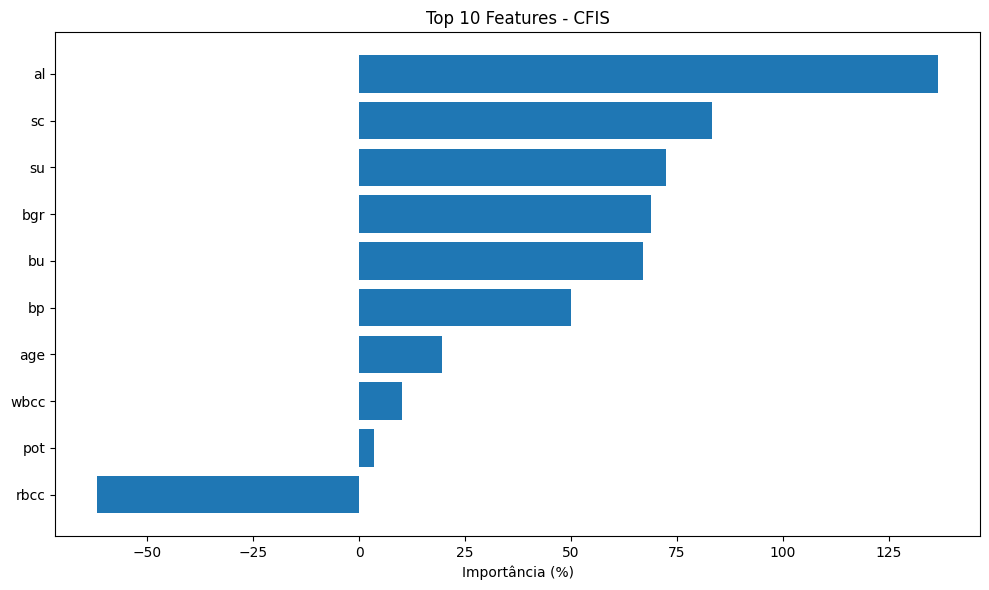

In [12]:
# Plotar top 10 features
plt.figure(figsize=(10, 6))
plt.barh(cfis_df['Feature'][:10][::-1], cfis_df['CFIS'][:10][::-1])
plt.xlabel('Importância (%)')
plt.title('Top 10 Features - CFIS')
plt.tight_layout()
plt.show()

<div style="background:#f0f8ff; padding:15px; border-left:6px solid #0066CC; border-radius:8px; margin:12px 0;">

# Referências  

[1] GODOY MARQUES, Vinicius Godoy. *A Métrica CFIS: Uma Nova Perspectiva na Análise da Importância das Features em Modelos de Machine Learning*. **Revista e-Fatec**, v. 14, n. 2, out. 2024.  

[2] GODOY MARQUES, V. *CFIS: Combined Feature Importance Score - Repositório*. GitHub, 2024. Disponível em: [https://github.com/vinigodoy1/cfis](https://github.com/vinigodoy1/cfis). Acesso em: 7 ago. 2024.  

[3] RUSSELL, Stuart; NORVIG, Peter. *Inteligência Artificial: uma abordagem moderna*. 3. ed. São Paulo: Pearson, 2016. 1152 p.  

</div>